# Disolver un shapefile

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
!pip install geopandas

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd

In [23]:
!pip install contextily
import contextily as ctx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 38.7 MB/s eta 0:00:00


In [5]:
ruta_distritos = "/content/drive/MyDrive/2022 II/2. Sistema de información geográfica/Distritos/DISTRITOS_inei_geogpsperu_suyopomalia.shp"
distritos = gpd.read_file(ruta_distritos)
distritos.head()

,UBIGEO,OBJECTID,NOMBDEP,NOMBPROV,NOMBDIST,CAPITAL,POBTOTAL,POB_EDAD_T,POB_EDAD_E,DENSIDAD,...,MUJERES__3,HOMBRES_NA,HOMBRES__2,TOTAL_NACI,IND_121951,IND_122042,IND_122047,IND_516462,IND_516484,geometry
0,100902,1.0,HUANUCO,PUERTO INCA,CODO DEL POZUZO,CODO DEL POZUZO,7768.0,5022.0,4329.0,2.338322,...,96.0,53.846154,112.0,208.0,37.0,11868.28878,9469.69031,75000.0,730.0,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,100904,2.0,HUANUCO,PUERTO INCA,TOURNAVISTA,TOURNAVISTA,6219.0,4162.0,3577.0,2.790716,...,63.0,51.908397,68.0,131.0,35.0,7746.84703,6279.18003,13500.0,1236.0,"POLYGON ((-75.20831 -9.10175, -75.20805 -9.101..."
2,250305,3.0,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,6085.0,4172.0,3616.0,31.892034,...,40.0,50.617284,41.0,81.0,53.0,3892.91357,3316.87044,43950.0,540.0,"POLYGON ((-74.95635 -8.79148, -74.95612 -8.792..."
3,250302,4.0,UCAYALI,PADRE ABAD,IRAZOLA,SAN ALEJANDRO,10941.0,7308.0,6368.0,10.952719,...,156.0,52.000000,169.0,325.0,176.0,11690.84202,11225.28471,125760.0,1366.0,"POLYGON ((-75.10843 -8.79990, -75.11753 -8.812..."
4,250304,5.0,UCAYALI,PADRE ABAD,NESHUYA,MONTE ALEGRE,9003.0,5983.0,5058.0,15.535539,...,0.0,0.000000,0.0,0.0,60.0,7432.20148,6834.75852,237441.0,691.0,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."


In [6]:
dissolve_provincia= distritos.dissolve(by="NOMBPROV")
dissolve_depa= distritos.dissolve(by="NOMBDEP")
dissolve_depa.head()

,geometry,UBIGEO,OBJECTID,NOMBPROV,NOMBDIST,CAPITAL,POBTOTAL,POB_EDAD_T,POB_EDAD_E,DENSIDAD,...,MUJERES_NA,MUJERES__3,HOMBRES_NA,HOMBRES__2,TOTAL_NACI,IND_121951,IND_122042,IND_122047,IND_516462,IND_516484
NOMBDEP,,,,,,,,,,,,,,,,,,,,,
AMAZONAS,"POLYGON ((-78.03480 -6.74216, -78.03437 -6.741...",010103,307.0,CHACHAPOYAS,BALSAS,BALSAS,1233.0,860.0,725.0,3.452911,...,48.275862,14.0,51.724138,15.0,29.0,13.0,603.26187,587.88095,15600.0,155.0
ANCASH,"POLYGON ((-77.70189 -10.32392, -77.70434 -10.3...",021805,197.0,SANTA,MORO,MORO,8311.0,6133.0,5097.0,23.127870,...,52.150538,97.0,47.849462,89.0,186.0,76.0,24620.32672,11771.60396,110000.0,813.0
APURIMAC,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5...",030607,195.0,CHINCHEROS,URANMARCA,URANMARCA,2820.0,2006.0,1581.0,18.960533,...,44.897959,22.0,55.102041,27.0,49.0,14.0,10827.81084,2585.93533,56928.0,570.0
AREQUIPA,"POLYGON ((-72.72968 -16.64631, -72.73106 -16.6...",040706,55.0,ISLAY,PUNTA DE BOMBON,PUNTA DE BOMBON,6696.0,5310.0,4414.0,8.698815,...,40.449438,36.0,59.550562,53.0,89.0,95.0,13231.83786,8488.67650,498662.0,350.0
AYACUCHO,"POLYGON ((-74.50284 -15.16064, -74.50360 -15.1...",050404,483.0,HUANTA,IGUAIN,MACACHACRA,2838.0,2104.0,1605.0,46.191406,...,40.000000,26.0,60.000000,39.0,65.0,28.0,6793.66231,6414.22084,69357.0,259.0


In [7]:
print("Numero de distritos:", len(distritos))
print("Numero de provincia:", len(dissolve_provincia))
print("Numero de departamentos:", len(dissolve_depa))

Numero de distritos: 1874
Numero de provincia: 196
Numero de departamentos: 25


In [8]:
dissolve_provincia.to_file("provincias.shp")
dissolve_depa.to_file("departamentos.shp")

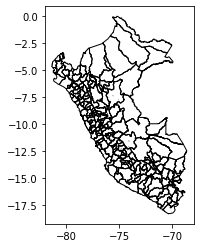

In [11]:
path = "/content/provincias.shp"
provincias_shp = gpd.read_file(path)
provincias_shp.plot(facecolor="none",edgecolor="black")

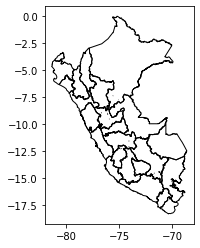

In [12]:
path1 = "/content/departamentos.shp"
depas_shp = gpd.read_file(path1)
depas_shp.plot(facecolor="none",edgecolor="black")

# Selección de un poligono y exportar

In [15]:
dissolve_provincia.head() 

,geometry,UBIGEO,OBJECTID,NOMBDEP,NOMBDIST,CAPITAL,POBTOTAL,POB_EDAD_T,POB_EDAD_E,DENSIDAD,...,MUJERES_NA,MUJERES__3,HOMBRES_NA,HOMBRES__2,TOTAL_NACI,IND_121951,IND_122042,IND_122047,IND_516462,IND_516484
NOMBPROV,,,,,,,,,,,,,,,,,,,,,
ABANCAY,"POLYGON ((-73.00899 -14.11630, -73.01195 -14.1...",030106,949.0,APURIMAC,LAMBRAMA,LAMBRAMA,3169.0,2541.0,1983.0,6.075304,...,60.810811,45.0,39.189189,29.0,74.0,31.0,5710.23501,4164.44496,29386.0,488.0
ACOBAMBA,"POLYGON ((-74.42770 -12.80396, -74.42625 -12.8...",090207,374.0,HUANCAVELICA,POMACOCHA,POMACOCHA,3024.0,2302.0,1762.0,56.354827,...,47.457627,28.0,52.542373,31.0,59.0,23.0,3392.01799,2027.37201,15000.0,409.0
ACOMAYO,"POLYGON ((-71.43996 -14.08138, -71.44061 -14.0...",080204,372.0,CUSCO,MOSOC LLACTA,MOSOC LLACTA,1203.0,932.0,744.0,27.585416,...,57.142857,4.0,42.857143,3.0,7.0,19.0,2796.74427,2305.18141,24240.0,73.0
AIJA,"POLYGON ((-77.55887 -9.86919, -77.55934 -9.869...",020205,275.0,ANCASH,SUCCHA,SUCCHA,752.0,575.0,414.0,9.538305,...,63.636364,7.0,36.363636,4.0,11.0,7.0,1162.89955,862.67830,8400.0,61.0
ALTO AMAZONAS,"POLYGON ((-75.53437 -5.90348, -75.53461 -5.904...",160206,739.0,LORETO,LAGUNAS,LAGUNAS,13420.0,8246.0,6638.0,2.263390,...,51.871658,194.0,48.128342,180.0,374.0,19.0,5199.43997,5394.37274,160534.0,4222.0


In [14]:
dissolve_provincia.index #el index es el nombre de las provincias

Index(['ABANCAY', 'ACOBAMBA', 'ACOMAYO', 'AIJA', 'ALTO AMAZONAS', 'AMBO',
       'ANDAHUAYLAS', 'ANGARAES', 'ANTA', 'ANTABAMBA',
       ...
       'UTCUBAMBA', 'VICTOR FAJARDO', 'VILCAS HUAMAN', 'VIRU', 'YAROWILCA',
       'YAULI', 'YAUYOS', 'YUNGAY', 'YUNGUYO', 'ZARUMILLA'],
      dtype='object', name='NOMBPROV', length=196)

In [17]:
dissolve_provincia.loc["TACNA"] #accediendo a la provincia de Tacna

geometry      POLYGON ((-70.34539847999997 -18.3207891099999...
UBIGEO                                                   230110
OBJECTID                                                   28.0
NOMBDEP                                                   TACNA
NOMBDIST                   CORONEL GREGORIO ALBARRACIN LANCHIPA
                                    ...                        
IND_121951                                                889.0
IND_122042                                          91277.61975
IND_122047                                           59267.3929
IND_516462                                            1867543.0
IND_516484                                               1616.0
Name: TACNA, Length: 77, dtype: object

In [18]:
#Creacion por GeoDataFrame
provincia_Tacna = gpd.GeoDataFrame([dissolve_provincia.loc["TACNA"]],crs=dissolve_provincia.crs)
#creación por tabala de atributos
provincia_Jorge_Basadre = distritos[distritos["NOMBPROV"] == "JORGE BASADRE"]

In [19]:
provincia_Tacna.head()

,geometry,UBIGEO,OBJECTID,NOMBDEP,NOMBDIST,CAPITAL,POBTOTAL,POB_EDAD_T,POB_EDAD_E,DENSIDAD,...,MUJERES_NA,MUJERES__3,HOMBRES_NA,HOMBRES__2,TOTAL_NACI,IND_121951,IND_122042,IND_122047,IND_516462,IND_516484
TACNA,"POLYGON ((-70.34540 -18.32079, -70.35388 -18.3...",230110,28.0,TACNA,CORONEL GREGORIO ALBARRACIN LANCHIPA,ALFONSO UGARTE,116636.0,87288.0,76995.0,621.263449,...,48.163265,708.0,51.836735,762.0,1470.0,889.0,91277.61975,59267.3929,1867543.0,1616.0


In [20]:
provincia_Jorge_Basadre.head()

,UBIGEO,OBJECTID,NOMBDEP,NOMBPROV,NOMBDIST,CAPITAL,POBTOTAL,POB_EDAD_T,POB_EDAD_E,DENSIDAD,...,MUJERES__3,HOMBRES_NA,HOMBRES__2,TOTAL_NACI,IND_121951,IND_122042,IND_122047,IND_516462,IND_516484,geometry
33,230303,34.0,TACNA,JORGE BASADRE,ITE,ITE,3208.0,2554.0,2318.0,3.781503,...,26.0,51.851852,28.0,54.0,197.0,41606.48160,25816.55276,15000.00,333.0,"POLYGON ((-70.71644 -17.77810, -70.72932 -17.7..."
41,230301,42.0,TACNA,JORGE BASADRE,LOCUMBA,LOCUMBA,2531.0,1934.0,1685.0,2.611998,...,23.0,42.500000,17.0,40.0,380.0,34349.61355,28429.08348,152313.64,179.0,"POLYGON ((-70.50890 -17.54534, -70.50907 -17.5..."
52,230302,53.0,TACNA,JORGE BASADRE,ILABAYA,ILABAYA,6069.0,4872.0,4438.0,5.460729,...,22.0,56.862745,29.0,51.0,623.0,59010.31514,33200.70800,442177.00,456.0,"POLYGON ((-70.43725 -17.33462, -70.43529 -17.3..."


In [97]:
provincia_Jorge_Basadre.to_file("Basadre.shp")
provincia_Tacna.to_file("Tacna.shp")

## Visualización en el mapa

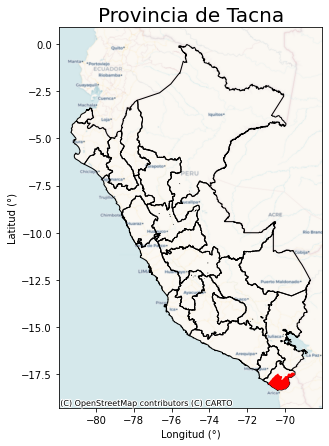

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
dissolve_depa.plot(ax=ax,facecolor="none",edgecolor="black")
provincia_Tacna.plot(ax=ax, facecolor="red")
ax.set_ylabel("Latitud (°)")
ax.set_xlabel("Longitud (°)")
ax.set_title("Provincia de Tacna",size=20)
ctx.add_basemap(ax, crs=dissolve_depa.crs,source=ctx.providers.CartoDB.Voyager)

# Unión

In [26]:
distritos.columns

Index(['UBIGEO', 'OBJECTID', 'NOMBDEP', 'NOMBPROV', 'NOMBDIST', 'CAPITAL',
       'POBTOTAL', 'POB_EDAD_T', 'POB_EDAD_E', 'DENSIDAD', 'POBMASCU',
       'POBFEMEN', 'POBMASCU_P', 'POBFEMEN_P', 'R_MASCULIN', 'POBURBANA',
       'POBRURAL', 'POBURBANA_', 'POBRURAL_P', 'EDAD_PROME', 'POB_0_14',
       'POB_15_29', 'POB_30_59', 'POB_60_MAS', 'VIV_PARTIC', 'VIV_PART_1',
       'HOGARES', 'Shape_Leng', 'Shape_Area', 'DIRECCION', 'POB_PROYEC',
       'POB_EDAD_1', 'POB_EDAD_2', 'EDAD_MEDIA', 'POB_0_14_P', 'POB_15_29_',
       'POB_30_59_', 'POB_60_M_1', 'POB_ANALFA', 'POB_ANAL_1', 'HOMBRES_AN',
       'HOMBRES__1', 'MUJERES_AN', 'MUJERES__1', 'MUJERES_ED', 'MUJERES__2',
       'TOTAL_MADR', 'MADRES_SOL', 'MADRES_S_1', 'MUJERES_AD', 'MADRES_ADO',
       'MADRES_A_1', 'AL_MENOS_1', 'AL_MENOS_2', 'SIN_DISCAP', 'SIN_DISC_1',
       'ALGUNA_NBI', 'NBI_PORC', 'VIV_PART_2', 'IC_INF', 'IC_SUP',
       'UBIC_POBMO', 'TOTAL_DEFU', 'TOTAL_DE_1', 'TOTAL_DE_2', 'NAC_BAJOPE',
       'NAC_BAJO_1', 'MUJERES_

In [33]:
Surquillo =  distritos[distritos["NOMBDIST"] == "SURQUILLO"]
San_Borja=  distritos[distritos["NOMBDIST"] == "SAN BORJA"]

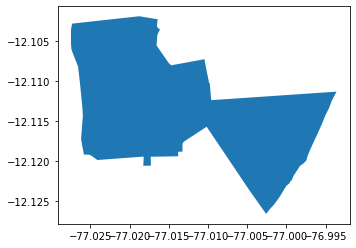

In [29]:
Surquillo.plot()

In [37]:
Surquillo.columns

Index(['UBIGEO', 'OBJECTID', 'NOMBDEP', 'NOMBPROV', 'NOMBDIST', 'CAPITAL',
       'POBTOTAL', 'POB_EDAD_T', 'POB_EDAD_E', 'DENSIDAD', 'POBMASCU',
       'POBFEMEN', 'POBMASCU_P', 'POBFEMEN_P', 'R_MASCULIN', 'POBURBANA',
       'POBRURAL', 'POBURBANA_', 'POBRURAL_P', 'EDAD_PROME', 'POB_0_14',
       'POB_15_29', 'POB_30_59', 'POB_60_MAS', 'VIV_PARTIC', 'VIV_PART_1',
       'HOGARES', 'Shape_Leng', 'Shape_Area', 'DIRECCION', 'POB_PROYEC',
       'POB_EDAD_1', 'POB_EDAD_2', 'EDAD_MEDIA', 'POB_0_14_P', 'POB_15_29_',
       'POB_30_59_', 'POB_60_M_1', 'POB_ANALFA', 'POB_ANAL_1', 'HOMBRES_AN',
       'HOMBRES__1', 'MUJERES_AN', 'MUJERES__1', 'MUJERES_ED', 'MUJERES__2',
       'TOTAL_MADR', 'MADRES_SOL', 'MADRES_S_1', 'MUJERES_AD', 'MADRES_ADO',
       'MADRES_A_1', 'AL_MENOS_1', 'AL_MENOS_2', 'SIN_DISCAP', 'SIN_DISC_1',
       'ALGUNA_NBI', 'NBI_PORC', 'VIV_PART_2', 'IC_INF', 'IC_SUP',
       'UBIC_POBMO', 'TOTAL_DEFU', 'TOTAL_DE_1', 'TOTAL_DE_2', 'NAC_BAJOPE',
       'NAC_BAJO_1', 'MUJERES_

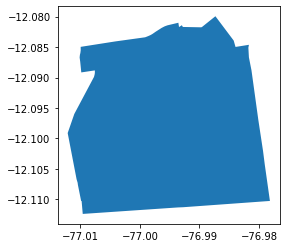

In [32]:
San_Borja.plot()

In [38]:
San_Borja.columns

Index(['UBIGEO', 'OBJECTID', 'NOMBDEP', 'NOMBPROV', 'NOMBDIST', 'CAPITAL',
       'POBTOTAL', 'POB_EDAD_T', 'POB_EDAD_E', 'DENSIDAD', 'POBMASCU',
       'POBFEMEN', 'POBMASCU_P', 'POBFEMEN_P', 'R_MASCULIN', 'POBURBANA',
       'POBRURAL', 'POBURBANA_', 'POBRURAL_P', 'EDAD_PROME', 'POB_0_14',
       'POB_15_29', 'POB_30_59', 'POB_60_MAS', 'VIV_PARTIC', 'VIV_PART_1',
       'HOGARES', 'Shape_Leng', 'Shape_Area', 'DIRECCION', 'POB_PROYEC',
       'POB_EDAD_1', 'POB_EDAD_2', 'EDAD_MEDIA', 'POB_0_14_P', 'POB_15_29_',
       'POB_30_59_', 'POB_60_M_1', 'POB_ANALFA', 'POB_ANAL_1', 'HOMBRES_AN',
       'HOMBRES__1', 'MUJERES_AN', 'MUJERES__1', 'MUJERES_ED', 'MUJERES__2',
       'TOTAL_MADR', 'MADRES_SOL', 'MADRES_S_1', 'MUJERES_AD', 'MADRES_ADO',
       'MADRES_A_1', 'AL_MENOS_1', 'AL_MENOS_2', 'SIN_DISCAP', 'SIN_DISC_1',
       'ALGUNA_NBI', 'NBI_PORC', 'VIV_PART_2', 'IC_INF', 'IC_SUP',
       'UBIC_POBMO', 'TOTAL_DEFU', 'TOTAL_DE_1', 'TOTAL_DE_2', 'NAC_BAJOPE',
       'NAC_BAJO_1', 'MUJERES_

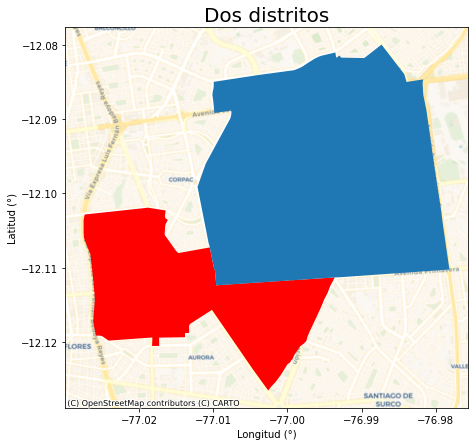

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
Surquillo.plot(ax=ax, facecolor="red")
San_Borja.plot(ax=ax)
ax.set_ylabel("Latitud (°)")
ax.set_xlabel("Longitud (°)")
ax.set_title("Dos distritos",size=20)
ctx.add_basemap(ax, crs=distritos.crs,source=ctx.providers.CartoDB.Voyager)

In [51]:
distrito_unido = Surquillo.union(San_Borja,align=False)
distrito_unido.to_file("dist_unido.shp")

In [52]:
ruta="/content/dist_unido.shp"
dist_unido = gpd.read_file(ruta)

In [53]:
dist_unido.head()

,FID,geometry
0,0,"POLYGON ((-76.99421 -12.11244, -76.99458 -12.1..."


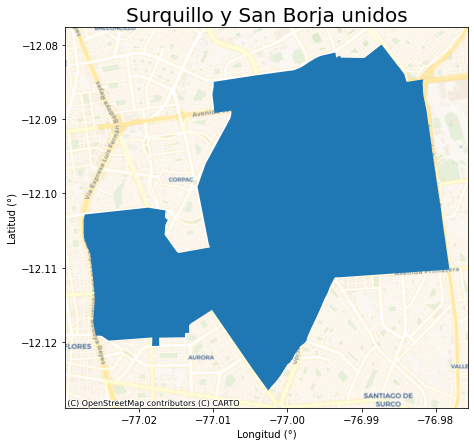

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
dist_unido.plot(ax=ax)
ax.set_ylabel("Latitud (°)")
ax.set_xlabel("Longitud (°)")
ax.set_title("Surquillo y San Borja unidos",size=20)
ctx.add_basemap(ax, crs=distritos.crs,source=ctx.providers.CartoDB.Voyager)

# Diferencia

In [64]:
ruta_poly1="/content/drive/MyDrive/2022 II/2. Sistema de información geográfica/Poligonos_creados/Poly1.shp"
ruta_poly2="/content/drive/MyDrive/2022 II/2. Sistema de información geográfica/Poligonos_creados/Poly2.shp"

In [65]:
poly1=gpd.read_file(ruta_poly1)
poly2=gpd.read_file(ruta_poly2)

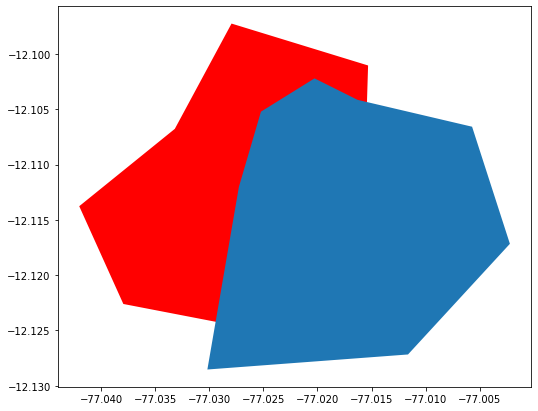

In [71]:
#antes
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
poly1.plot(ax=ax,facecolor="red")
poly2.plot(ax=ax)

In [66]:
diferencia = poly1.difference(poly2)
diferencia.to_file("diferencia.shp")
ruta1="/content/diferencia.shp"
dist_diferencia= gpd.read_file(ruta1)

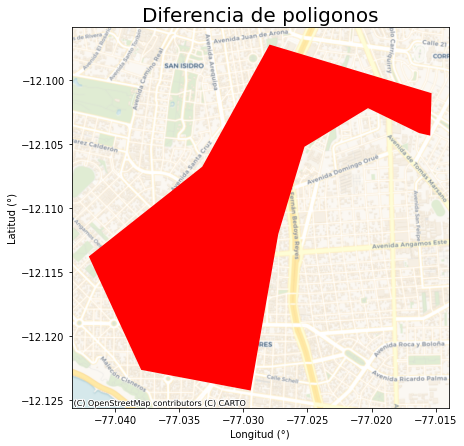

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
diferencia.plot(ax=ax,facecolor="red")
ax.set_ylabel("Latitud (°)")
ax.set_xlabel("Longitud (°)")
ax.set_title("Diferencia de poligonos",size=20)
ctx.add_basemap(ax, crs=distritos.crs,source=ctx.providers.CartoDB.Voyager) 

# Intersección

In [74]:
intersect = poly1.intersection(poly2)
intersect.to_file("intersect.shp")

In [75]:
ruta2="/content/intersect.shp"
intersection= gpd.read_file(ruta2)
intersection.head()

,FID,geometry
0,0,"POLYGON ((-77.01561 -12.11036, -77.02095 -12.1..."


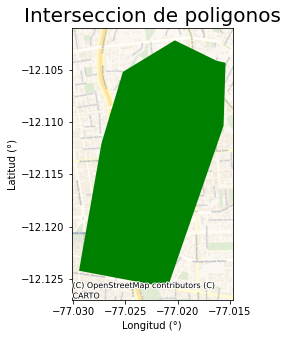

In [103]:
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
intersection.plot(ax=ax,facecolor="green")
ax.set_ylabel("Latitud (°)")
ax.set_xlabel("Longitud (°)")
ax.set_title("Interseccion de poligonos",size=20)
ctx.add_basemap(ax, crs=distritos.crs,source=ctx.providers.CartoDB.Voyager) 

# Diferencia simetrica

In [78]:
diferencia_simetrica = poly1.symmetric_difference(poly2)
diferencia_simetrica.to_file("simetria.shp")

In [79]:
ruta3="/content/simetria.shp"
simetria= gpd.read_file(ruta3)
simetria.head()

,FID,geometry
0,0,"MULTIPOLYGON (((-77.02795 -12.09724, -77.01532..."


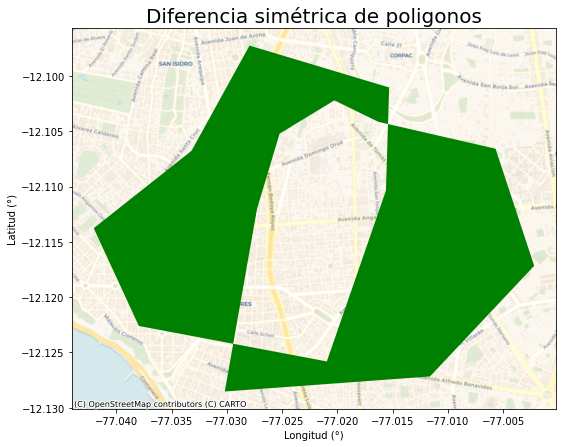

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
simetria.plot(ax=ax,facecolor="green")
ax.set_ylabel("Latitud (°)")
ax.set_xlabel("Longitud (°)")
ax.set_title("Diferencia simétrica de poligonos",size=20)
ctx.add_basemap(ax, crs=distritos.crs,source=ctx.providers.CartoDB.Voyager) 

# Clip

In [60]:
ruta_centros = "/content/drive/MyDrive/2022 II/2. Sistema de información geográfica/Centros_educativos/IE_P.shp"
centros_educativos = gpd.read_file(ruta_centros)
centros_educativos.head()

,CODLOCAL,NOMCPSIG,FUENTE_LOC,FTE_LOCD,X_LONGITUD,Y_LATITUD,CORD_YX,NALT_LOCAL,CEN_EDU_L,CODCPSIG,geometry
0,014974,LA LIBERTAD,MED_GPS,SIGMED14,-78.486837,-5.962129,-5.96212924199995-78.48683662,1583,16243,529395,POINT (-78.48684 -5.96213)
1,014988,YAMON,MED_GPS,SIGMED14,-78.528944,-6.050399,-6.05039911399996-78.5289442869999,1031,16289,132019,POINT (-78.52894 -6.05040)
2,014993,VISTA ALEGRE,MED_GPS,SIGMED14,-78.539342,-6.000296,-6.00029574799993-78.539341582,1646,16290,531295,POINT (-78.53934 -6.00030)
3,015006,TIERRA PROMETIDA,MED_GPS,SIGMED14,-78.559400,-6.016378,-6.01637784899998-78.559400071,1254,16291,125198,POINT (-78.55940 -6.01638)
4,015011,EL PALTO,MED_GPS,SIGMED14,-78.496005,-6.011921,-6.01192059199997-78.496004844,1116,16293,125380,POINT (-78.49600 -6.01192)


In [81]:
centros_clip = centros_educativos.clip(Surquillo)
centros_clip.head()

,CODLOCAL,NOMCPSIG,FUENTE_LOC,FTE_LOCD,X_LONGITUD,Y_LATITUD,CORD_YX,NALT_LOCAL,CEN_EDU_L,CODCPSIG,geometry
29416,342800,MIRAFLORES,UBICACION_WEB_MED,EDITOR_SIG14,-77.01530,-12.11920,-12.1192-77.0153,108,42 ELIZABETH ESPEJO DE MARROQUIN,529304,POINT (-77.01530 -12.11920)
29454,343461,SURQUILLO,UBICACION_WEB,EDITOR_UGEL,-77.01716,-12.11804,-12.11804-77.01716,108,GOTITAS DE AMOR DE JESUS,525466,POINT (-77.01716 -12.11804)
55389,635879,SURQUILLO,UBICACION_WEB,EDITOR_UGEL16,-77.01642,-12.11752,-12.11752-77.01642,110,SANTISIMO COLLEGE,525466,POINT (-77.01642 -12.11752)
29447,343324,SURQUILLO,UBICACION_WEB,EDITOR_UGEL,-77.02142,-12.11801,-12.11801-77.02142,102,VIRGEN DE COCHARCAS,525466,POINT (-77.02142 -12.11801)
12015,811491,SURQUILLO,UBICACION_WEB_MED,EDITOR_IE16,-77.02560,-12.11669,-12.1166899999999-77.0255999999999,99,TECNOLOGIA CENTRALIZADA,525466,POINT (-77.02560 -12.11669)


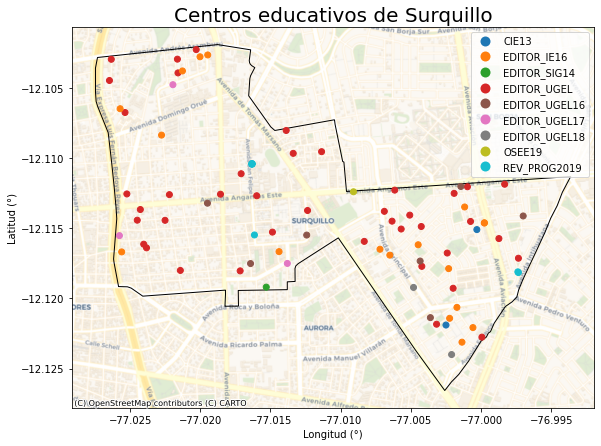

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
Surquillo.plot(ax=ax,facecolor="none",edgecolor="black")
centros_clip.plot(ax=ax, column="FTE_LOCD",legend=True)
ax.set_ylabel("Latitud (°)")
ax.set_xlabel("Longitud (°)")
ax.set_title("Centros educativos de Surquillo",size=20)
ctx.add_basemap(ax, crs=distritos.crs,source=ctx.providers.CartoDB.Voyager) 

# Merge

In [85]:
ruta36v = "/content/drive/MyDrive/2022 II/2. Sistema de información geográfica/CURVAS/36v/36v-curvas.shp"
ruta36x = "/content/drive/MyDrive/2022 II/2. Sistema de información geográfica/CURVAS/36x/36x-curvas.shp"
ruta37u = "/content/drive/MyDrive/2022 II/2. Sistema de información geográfica/CURVAS/37u/37u-curvas.shp"
ruta37v = "/content/drive/MyDrive/2022 II/2. Sistema de información geográfica/CURVAS/37v/37v-curvas.shp"

In [86]:
curvas_36v = gpd.read_file(ruta36v)
curvas_36x = gpd.read_file(ruta36x)
curvas_37u = gpd.read_file(ruta37u)
curvas_37v = gpd.read_file(ruta37v)

In [87]:
curvas_calimpa = gpd.pd.concat([curvas_36v,curvas_36x,curvas_37u,curvas_37v])
curvas_calimpa.to_file("curvas_calimpa_python.shp")

In [89]:
path1 = "/content/curvas_calimpa_python.shp"
curvas_python = gpd.read_file(path1)
curvas_python.head()

,Z,CODIGO,geometry
0,1800,2835,"LINESTRING (341276.420 8064508.280, 341232.330..."
1,2200,2835,"LINESTRING (342432.510 8061478.820, 342503.760..."
2,2000,2835,"LINESTRING (352862.790 8063223.210, 352945.280..."
3,1800,2835,"LINESTRING (354323.210 8064606.470, 354321.140..."
4,2000,2835,"LINESTRING (354600.570 8064608.470, 354601.700..."


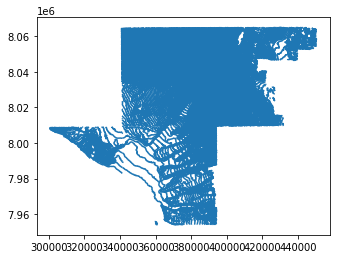

In [90]:
curvas_python.plot()

# Adicional

In [92]:
ruta_cuenca = "/content/drive/MyDrive/2022 II/2. Sistema de información geográfica/calimpa/Calimpa_19s.shp"
calimpa = gpd.read_file(ruta_cuenca)

In [93]:
curvas_clip = curvas_python.clip(calimpa)
curvas_clip.head()

,Z,CODIGO,geometry
2740,600,2834,"LINESTRING (368623.520 8009374.770, 368652.410..."
2520,25,2734,"LINESTRING (338746.813 7984916.102, 338865.500..."
2529,50,2734,"LINESTRING (339850.445 7987155.490, 339891.490..."
2681,75,2834,"LINESTRING (341353.888 7989282.245, 341440.910..."
2697,300,2834,"LINESTRING (358658.748 8000230.530, 358631.460..."


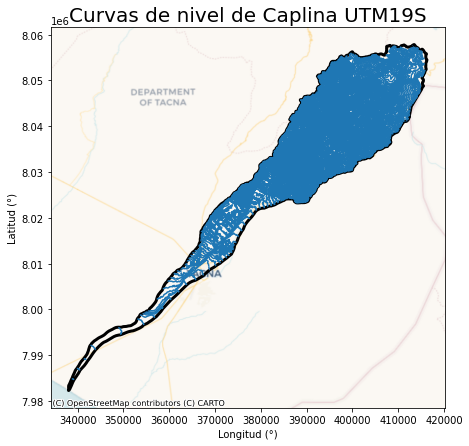

In [105]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))
curvas_clip.plot(ax=ax)
lugar = calimpa.plot(ax=ax,facecolor="none",edgecolor="black", linewidth=3)
ax.set_ylabel("Latitud (°)")
ax.set_xlabel("Longitud (°)")
ax.set_title("Curvas de nivel de Caplina UTM19S",size=20)
ctx.add_basemap(ax, crs=calimpa.crs,source=ctx.providers.CartoDB.Voyager) 

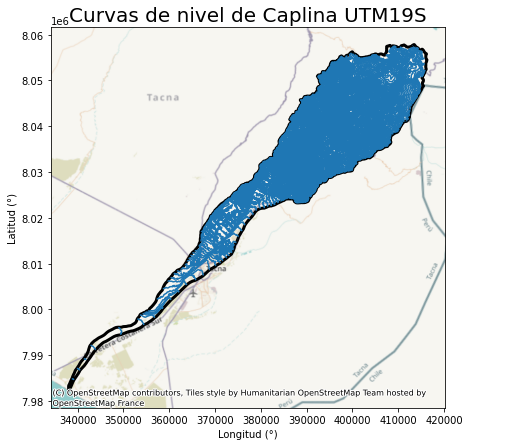

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))
curvas_clip.plot(ax=ax)
lugar = calimpa.plot(ax=ax,facecolor="none",edgecolor="black", linewidth=3)
ax.set_ylabel("Latitud (°)")
ax.set_xlabel("Longitud (°)")
ax.set_title("Curvas de nivel de Caplina UTM19S",size=20)
ctx.add_basemap(ax, crs=calimpa.crs,source=ctx.providers.OpenStreetMap.HOT) 